

```
# This is formatted as code
```

# Project Title: Exploring Success Factors in Formula 1 Racing: Insights on Age, Country, and Constructors

Members: Jonathan Zhang, Fiona Xiao, Julia Yang, Rita Wang

From Sections 4 and 5

#Introduction

Formula 1 (F1), sanctioned by the Fédération Internationale de l'Automobile (FIA), is a high-speed, open-wheel racing sport that features some of the world's most advanced racing cars. The sport comprises a series of races held across the globe, with drivers competing for the championship title by accumulating points based on their performance in each race. The cars are designed to be extremely fast and agile, with cutting-edge technology and engineering to achieve maximum performance. 

In our final project, we aimed to explore various aspects of F1 racing, and we divided our research into three parts. For the first part of our study, we delved into the correlation between driver success and their age. We uncovered that drivers around the age of 30 consistently outperformed their younger and older peers. Then we expanded our investigation geographically, examining which countries produced the best drivers. Finland, turned out, ranked as the top country for producing the most successful drivers. For the final phase of our project, we conducted an in-depth analysis to investigate the relationship between constructor countries and driver success. Our findings unveiled that Austrian constructors are exceptionally successful in producing victorious cars. For each part, we employed diverse datasets, sophisticated data manipulation techniques, and advanced visualization tools to extract valuable insights into the multifaceted realm of F1 racing.

Our research questions provide valuable insights into F1 racing and its broader impact on society. The results inform training and development programs for aspiring drivers and policies promoting athletic development in different countries, and contribute to debates about the role of sports in promoting national pride and identity. Overall, by examining various aspects of F1 racing, we can gain a deeper understanding of the physical and mental demands of professional racing, as well as the cultural and technological factors that contribute to athletic success.


##Importing libraries and datasets of interest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
races = pd.read_csv("/content/races.csv") # used in part 1
drivers = pd.read_csv("/content/drivers.csv") # used in parts 1 & 2
driver_standings = pd.read_csv("/content/driver_standings.csv") # used in parts 1 & 2
constructors = pd.read_csv("/content/constructors.csv") # used in part 3
results = pd.read_csv("/content/results.csv") # used in part 3

# Data Checking


## Data Description

We will be using races, driver standing, and driver dataset for Part 1, the relationship between age and driver success. The columns used are raceId, driverId, dob, wins, year, and date. 

|Name of the variable|Dataset|Meaning|
----|----|----
|raceId|race; driver standing|Primary key of each race|
|driverId|driver standing; driver|Primary key for each driver|
|dob|driver|Driver date of birth|
|wins|driver standing|Driver season win count|
|year|race|Foreign key link to seasons table|
|date|race|Race date|

The dataset Races contains 1102 observations recording the year, date, and basic information of each race. 

The dataset driver_standings contains 33902 observations, recording the total win count up to each race in a season and standings position for each driver in each race. 

The dataset drivers contains 857 observations, recording the name, date of birth, and basic information of each driver. 

In [ ]:
print (len(races.index))
print (len(driver_standings.index))
print (len(drivers.index))

1102
33902
857


We will be reusing driver standing and driver dataset for Part 2, the relationship between nationality and driver success. The columns used are driverId, wins, and nationality. 

|Name of the variable|Dataset|Meaning|
----|----|----
|driverId|driver standing; driver|Primary key for each driver|
|wins|driver standing|Driver season win count|
|nationality|driver|Driver nationality|

The main columns used from the datasets driver_standings and drivers are described above. 

We will be using results and constructors dataset for Part 3, the relationship between constructor nationality and driver success. The columns used are constructorId, nationality, and points. 

|Name of the variable|Dataset|Meaning|
----|----|----
|constructorId|results; constructors|Primary key of each constructor|
|points|results|Driver points for race|
|nationality|constructors|Constructor nationality|


The dataset results contains 25840 races recording the points, times, laps, and more information about each race. 

The dataset constructors contains 221 observations, recording nationality and url of each constructor. 


In [ ]:
print (len(results.index))
print (len(constructors.index))

25840
211


##Data Cleaning

For all tables used, we checked their sizes and their column datatypes. Also, each column of interest was check to make sure it contained no missing values (e.g., columns that contained dates) or no NaNs (e.g., columns that are of types int or float). There was also a visual examination of whether "nationality" contained any misspelled entries.

In [ ]:
nan = np.nan

print(drivers.shape)
print(drivers.dtypes)
display(drivers.query('driverId == @nan'))
display(drivers.query('nationality.isnull() == True'))
display(drivers.query('dob.isnull() == True'))
display(pd.unique(drivers["nationality"]))

(857, 9)
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object


,driverId,driverRef,number,code,forename,surname,dob,nationality,url


,driverId,driverRef,number,code,forename,surname,dob,nationality,url


,driverId,driverRef,number,code,forename,surname,dob,nationality,url


array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian', 'Chinese'], dtype=object)

In [ ]:
print(driver_standings.shape)
print(driver_standings.dtypes)
display(driver_standings.query('raceId == @nan'))
display(driver_standings.query('wins == @nan'))

(33902, 7)
driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object


,driverStandingsId,raceId,driverId,points,position,positionText,wins


,driverStandingsId,raceId,driverId,points,position,positionText,wins


In [ ]:
print(races.shape)
print(races.dtypes)
display(races.query('raceId == @nan'))
display(races.query('year == @nan'))
display(races.query('date.isnull() == True'))

(1102, 18)
raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time


In [ ]:
print(constructors.shape)
print(constructors.dtypes)
display(constructors.query('constructorId == @nan'))
display(constructors.query('nationality.isnull() == True'))
display(pd.unique(constructors["nationality"]))

(211, 5)
constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object


,constructorId,constructorRef,name,nationality,url


,constructorId,constructorRef,name,nationality,url


array(['British', 'German', 'French', 'Italian', 'Japanese', 'Austrian',
       'Indian', 'Dutch', 'Russian', 'Swiss', 'Irish', 'Hong Kong',
       'Brazilian', 'Canadian', 'Mexican', 'American', 'Australian',
       'New Zealander', 'South African', 'Rhodesian', 'Belgian',
       'East German', 'Spanish', 'Malaysian'], dtype=object)

In [ ]:
print(results.shape)
print(results.dtypes)
display(results.query('raceId == @nan'))
display(results.query('constructorId == @nan'))
display(results.query('points == @nan'))

(25840, 18)
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


# Part 1 Data Aggregation

Since the "wins" column from driver_standings table records the total number of wins a driver has received up to a certain race, we had to manipulate the dataset to only obtain the rows that show the wins each driver had by the end of each season. This was done by computing the latest race in a specified season for each entry in the driver_standings table. Then, we filtered out all the tuples where the date the standings was recorded did not match the date of the last race in that season. Now, we can properly compute, without double counting, how many wins a driver had in any given season.

In [ ]:
races["date"] = pd.to_datetime(races["date"])
driver_standings = pd.merge(driver_standings[["raceId", "driverId", "wins"]], races[["raceId", "year", "date"]], how="left", on="raceId")
season_last_race = driver_standings.groupby(["driverId", "year"], as_index=False).agg(max_date=("date", "max"))
driver_standings  = pd.merge(driver_standings, season_last_race[["driverId", "year", "max_date"]], how="left", on=["driverId", "year"])
driver_standings = driver_standings.query('date == max_date').drop(axis=1, columns=["date", "max_date"])

driver_standings = pd.merge(driver_standings, drivers[["driverId", "dob"]], how="left", on="driverId")
driver_standings["dob"] = pd.to_datetime(driver_standings["dob"])
driver_standings["dob"] = driver_standings["dob"].dt.strftime("%Y")
driver_standings["dob"] = pd.to_numeric(driver_standings["dob"])
driver_standings["age"] = driver_standings["year"] - driver_standings["dob"]
driver_standings.describe()

,raceId,driverId,wins,year,dob,age
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,619.131712,358.905875,0.341756,1976.783639,1945.284586,31.499052
std,251.062574,250.180224,1.256669,20.847985,23.955953,6.160094
min,17.000000,1.000000,0.000000,1950.000000,1896.000000,18.000000
25%,451.000000,137.000000,0.000000,1958.000000,1926.000000,27.000000
50%,698.000000,341.000000,0.000000,1973.000000,1942.000000,31.000000
75%,798.000000,556.000000,0.000000,1992.000000,1963.000000,35.000000
max,1098.000000,858.000000,15.000000,2023.000000,2001.000000,59.000000


To measure the relationship between age and success, we decided to focus on the mean of "wins" after grouping by "age." So for each age, we have an average number of wins that drivers of that age tend to get. We also computed the standard deviation in the same way. Notice that after the age of 48, the means and standard deviations are mostly 0. So, we assumed that any non-zero data points beyond 48 years of age were considered outliers in our analysis.

In [ ]:
mean_wins = driver_standings.groupby("age", as_index=False).agg(mean_wins=("wins", "mean")).sort_values(by="age")
std_wins = driver_standings.groupby("age", as_index=False).agg(std_wins=("wins", "std")).sort_values(by="age")
display(mean_wins)
display(std_wins)

,age,mean_wins
0,18,0.000000
1,19,0.200000
2,20,0.142857
3,21,0.085714
4,22,0.235294
5,23,0.151515
6,24,0.333333
7,25,0.382353
8,26,0.451429
9,27,0.300000


,age,std_wins
0,18,0.000000
1,19,0.447214
2,20,0.534522
3,21,0.373491
4,22,0.812544
5,23,0.747289
6,24,1.470190
7,25,1.561647
8,26,1.603404
9,27,0.953690


# Part 1 Results

As seen in the purple scatter plot below, drivers just above the age of 30 (e.g., 33) have the highest average wins within a season. If a driver is a lot younger (e.g., 20) or a lot older (e.g., 45), they performed relatively worse, with lower average wins within a season. We can draw more insights from the red scatter plot, where standard deviation in wins within a season is plotted for any given age. Note that drivers around the age of 33 also tend to fluctuate a lot in the number of wins they get in a season. So, while it is true that drivers around this age tend to perform better on average, there is a also large gap in wins between good and bad drivers around this age.

Text(0.5, 1.0, 'Fluctuations in Wins Per Age')

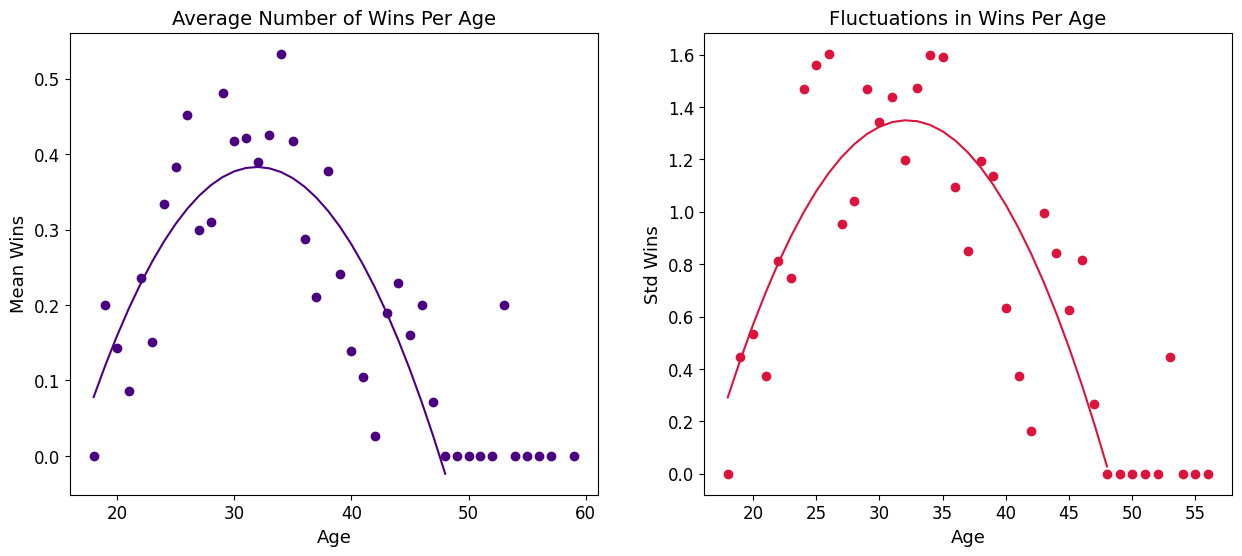

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

x = mean_wins.query("age <= 48")["age"]
y = mean_wins.query("age <= 48")["mean_wins"]
a, b, c = np.polyfit(x, y, 2)
color = 'indigo'
ax[0].scatter(x=mean_wins["age"], y=mean_wins["mean_wins"], color=color)
ax[0].plot(x, a*(x**2)+b*x+c, color=color)
ax[0].set_xlabel("Age", fontsize=13)
ax[0].set_ylabel("Mean Wins", fontsize=13)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_title("Average Number of Wins Per Age", fontsize=14)

x = std_wins.query("age <= 48")["age"]
y = std_wins.query("age <= 48")["std_wins"]
a, b, c = np.polyfit(x, y, 2)
color = 'crimson'
ax[1].scatter(x=std_wins["age"], y=std_wins["std_wins"], color=color)
ax[1].plot(x, a*(x**2)+b*x+c, color=color)
ax[1].set_xlabel("Age", fontsize=13)
ax[1].set_ylabel("Std Wins", fontsize=13)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].set_title("Fluctuations in Wins Per Age", fontsize=14)

Further analysis can be done from the below histograms. The left graph depicts the number of times a driver with a certain age appeared throughout all the seasons, and the right graph shows the number of races for some average age. In both histograms, we can see that most drivers who participate in F1 races are around 30, the age where we noticed the highest average number of wins for a season. So there may be other factors that contribute to the correlation we noticed between age and success in the above scatter plot.

Text(0.5, 1.0, 'Number of Races Per Average Age Group')

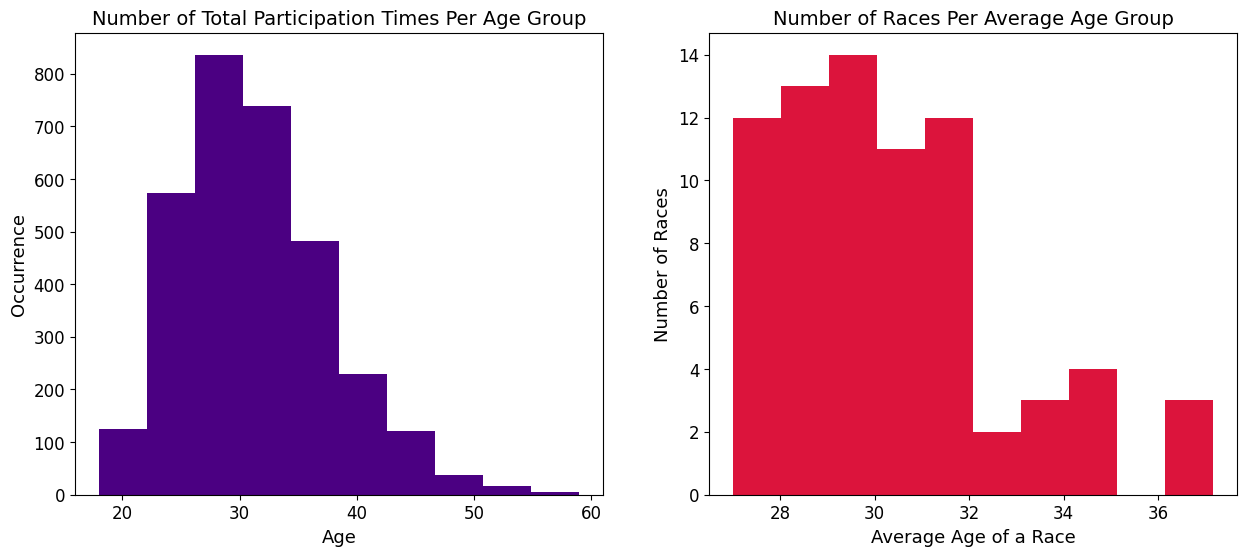

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

color = 'indigo'
ax[0].hist(driver_standings["age"], color=color)
ax[0].set_xlabel("Age", fontsize=13)
ax[0].set_ylabel("Occurrence", fontsize=13)
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_title("Number of Total Participation Times Per Age Group", fontsize=14)

color = 'crimson'
ax[1].hist(driver_standings.groupby("raceId").agg(mean_age=("age", "mean")), color=color)
ax[1].set_xlabel("Average Age of a Race", fontsize=13)
ax[1].set_ylabel("Number of Races", fontsize=13)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].set_title("Number of Races Per Average Age Group", fontsize=14)

# Part 2 Data Aggregation

Now, we are interested in finding which country produces the best drivers. To do so, we reused the cleaned driver_standings table from part 1. Instead of grouping by age, we group by "driverId," where a sum of wins is calculated, and then group by "nationality," where means and standard deviations are computed. We perform these steps with a goal of finding the average and the standard deviation in the number of wins a driver gets throughout their career from a given country.

In [ ]:
wins = driver_standings.groupby("driverId", as_index=False).agg(sum_wins=("wins", "sum"))
drivers_wins = pd.merge(drivers[["driverId", "nationality"]], wins, how="left", on="driverId")
drivers_wins.describe()

,driverId,sum_wins
count,857.000000,850.000000
mean,429.057176,1.272941
std,247.632402,6.551659
min,1.000000,0.000000
25%,215.000000,0.000000
50%,429.000000,0.000000
75%,643.000000,0.000000
max,858.000000,103.000000


In [ ]:
country_stats = drivers_wins.groupby("nationality", as_index=False).agg(count_drivers=("driverId", "count"), mean_wins=("sum_wins", "mean"), std_wins=("sum_wins", "std"))
mean_wins = country_stats.sort_values(by="mean_wins", ascending=False)
std_wins = country_stats.sort_values(by="std_wins", ascending=False)

# Part 2 Results

By the average number of career wins per driver, Finland comes out on top, followed by Germany and Brazil. However, after plotting the number of different drivers from each country, we can see that Finland does not have many unique drivers. While Finland has been the most successful, we cannot be sure that it has an abundance of talented drivers.

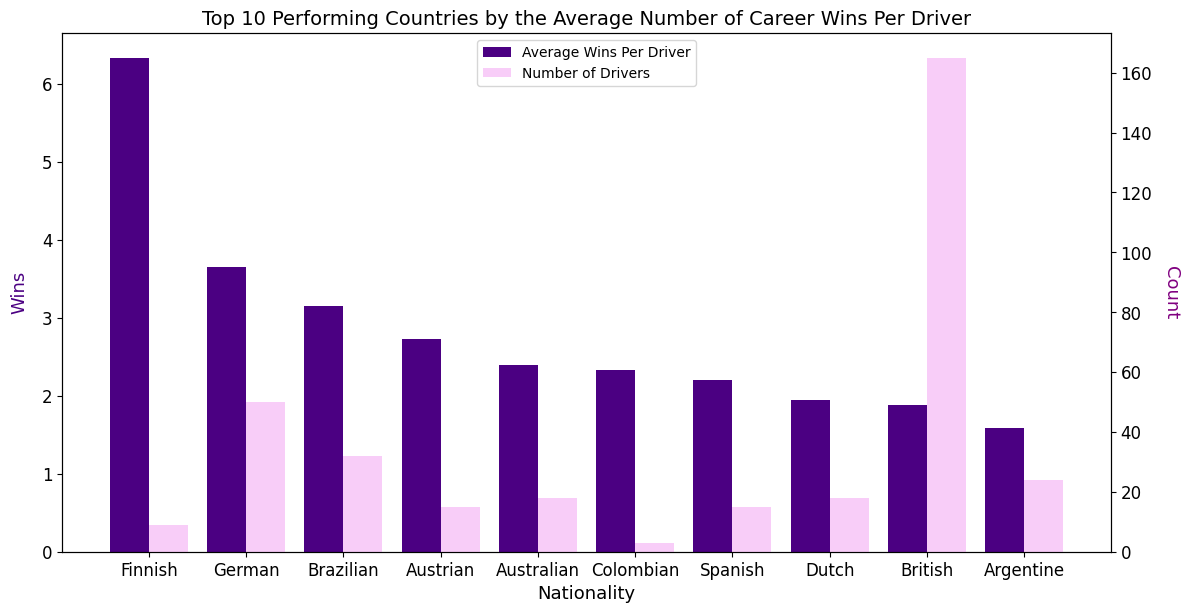

In [ ]:
X = mean_wins["nationality"].iloc[:10].values.tolist()
mean = mean_wins["mean_wins"].iloc[:10].values.tolist()
count = mean_wins["count_drivers"].iloc[:10].values.tolist()
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(12, 6))

color = 'indigo'
ax.set_xlabel('Nationality', fontsize=13)
ax.set_ylabel("Wins", fontsize=13, color=color, rotation=90, labelpad=10)
mean_bar = ax.bar(X_axis - 0.2, mean, 0.4, color=color)
ax.xaxis.set_ticks(X_axis)
ax.xaxis.set_ticklabels(X)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

rightAxis = ax.twinx()
color = 'violet'
rightAxis.set_ylabel("Count", fontsize=13, color="purple", rotation=-90, labelpad=20)
count_bar = rightAxis.bar(X_axis + 0.2, count, 0.4, alpha=0.4, color=color)
rightAxis.yaxis.set_tick_params(labelsize=12)

ax.legend([mean_bar, count_bar], ["Average Wins Per Driver", "Number of Drivers"], loc=9)
fig.tight_layout()
ax.set_title("Top 10 Performing Countries by the Average Number of Career Wins Per Driver", fontsize=14)
plt.show()

We also plot the standard deviation in total career wins across a country's drivers. This time, Germany has the tallest bar. This means that among all drivers from Germany, some might have had very successful driving careers while others might be new drivers who have not participated in many seasons or might not be so talented. In any case, we should caution against saying that Germany can consistently produce excellent drivers. A similar conclusion can be said for Finland as well since the fluctuation in career wins across its drivers is also not negligible.

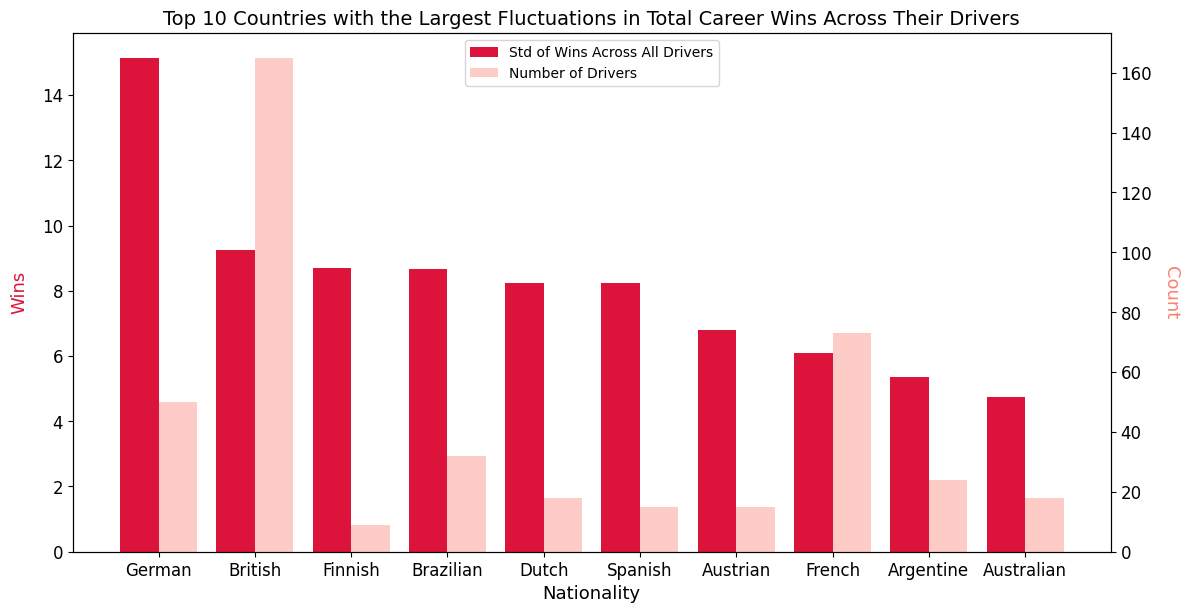

In [ ]:
X = std_wins["nationality"].iloc[:10].values.tolist()
std = std_wins["std_wins"].iloc[:10].values.tolist()
count = std_wins["count_drivers"].iloc[:10].values.tolist()
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(12, 6))

color = 'crimson'
ax.set_xlabel('Nationality', fontsize=13)
ax.set_ylabel("Wins", fontsize=13, color=color, rotation=90, labelpad=10)
std_bar = ax.bar(X_axis - 0.2, std, 0.4, color=color)
ax.xaxis.set_ticks(X_axis)
ax.xaxis.set_ticklabels(X)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

rightAxis = ax.twinx()
color = 'salmon'
rightAxis.set_ylabel("Count", fontsize=13, color=color, rotation=-90, labelpad=20)
count_bar = rightAxis.bar(X_axis + 0.2, count, 0.4, alpha=0.4, color=color)
rightAxis.yaxis.set_tick_params(labelsize=12)

ax.legend([std_bar, count_bar], ["Std of Wins Across All Drivers", "Number of Drivers"], loc=9)
fig.tight_layout()
ax.set_title("Top 10 Countries with the Largest Fluctuations in Total Career Wins Across Their Drivers", fontsize=14)
plt.show()

# Part 3 Data Aggregation

To investigate a potential relationship between constructor nationality and driver success, we decided to use the column "points" from the results dataset as a measure for sucess. To bring in the nationality of a constructor given its constructorId, we merged the tables constructors and results together. Then, we grouped by "nationality" and computed the mean of points earned by drivers for each constructor nationality. 

In [ ]:
results = pd.merge(results[["constructorId", "points"]], constructors[["constructorId", "nationality"]], how="left", on="constructorId")
display(results.describe())

,constructorId,points
count,25840.000000,25840.000000
mean,48.628328,1.877053
std,59.732131,4.169849
min,1.000000,0.000000
25%,6.000000,0.000000
50%,25.000000,0.000000
75%,58.000000,2.000000
max,214.000000,50.000000


In [ ]:
results = results.groupby("nationality", as_index=False).agg(mean_points=("points", "mean"))
constructor_count = constructors.groupby("nationality", as_index=False).agg(count=("constructorId", "count"))
results = pd.merge(results, constructor_count, how="left", on="nationality").sort_values(by="mean_points", ascending=False)

# Part 3 Results

From the bar char below, we found that vehicles by Austrian and German constructors earned the two highest average number of points. However, this conclusion might be a result from the coincidence that the drivers whom these constructors work with just happen to be the best drivers. So, it might be that the drivers who work with these constructors are causing the high average points. Nonetheless, a rudimentary analysis seems to suggest that Austrian and German constructors make better-performing racecars.

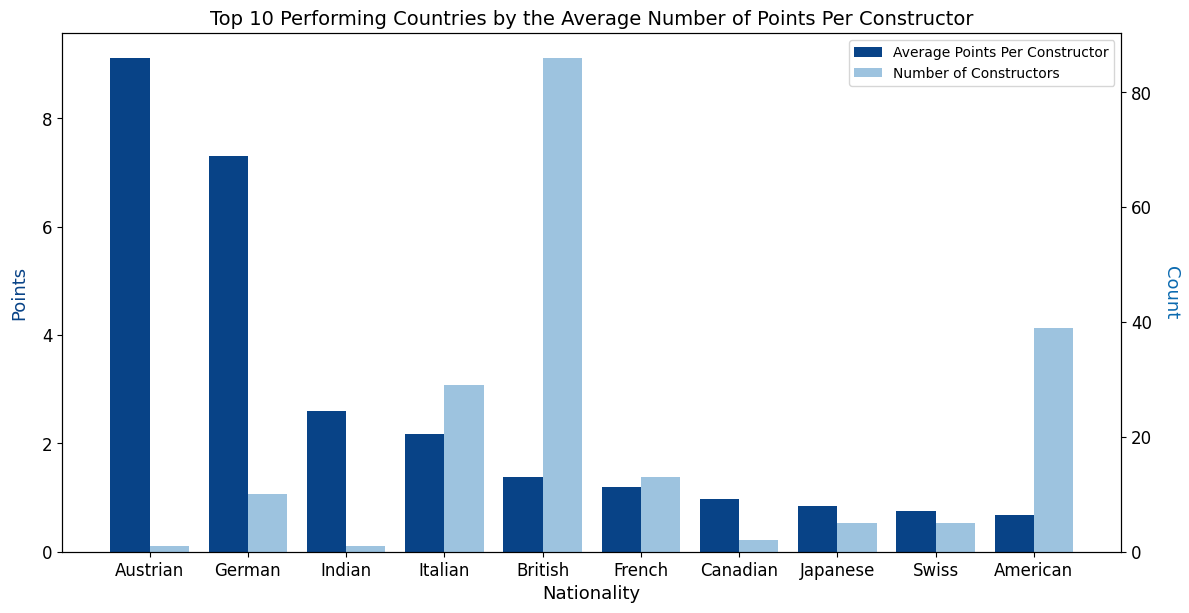

In [ ]:
X = results["nationality"].iloc[:10].values.tolist()
mean = results["mean_points"].iloc[:10].values.tolist()
count = results["count"].iloc[:10].values.tolist()
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(12, 6))

color = '#084387'
ax.set_xlabel('Nationality', fontsize=13)
ax.set_ylabel("Points", fontsize=13, color=color, rotation=90, labelpad=10)
std_bar = ax.bar(X_axis - 0.2, mean, 0.4, color=color)
ax.xaxis.set_ticks(X_axis)
ax.xaxis.set_ticklabels(X)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

rightAxis = ax.twinx()
color = '#0b6ab0'
rightAxis.set_ylabel("Count", fontsize=13, color=color, rotation=-90, labelpad=20)
count_bar = rightAxis.bar(X_axis + 0.2, count, 0.4, alpha=0.4, color=color)
rightAxis.yaxis.set_tick_params(labelsize=12)

ax.legend([std_bar, count_bar], ["Average Points Per Constructor", "Number of Constructors"], loc=1)
fig.tight_layout()
ax.set_title("Top 10 Performing Countries by the Average Number of Points Per Constructor", fontsize=14)
plt.show()

# Discussion

Overall, our study provides valuable insights into various aspects of Formula 1 racing that could possibly impact a driver's success. Part 1 suggests that drivers around the age of 30 tend to outperform their younger and older peers on average. However, it also comes with a large gap in the number of wins between good and bad drivers around this age. In general, it is when most drivers participate in a race. Part 2 highlights that Finland has produced the most successful drivers in terms of average career wins, but it is unclear whether this is due to an abundance of talented drivers or other factors. Part 3 suggests that Austrian and German constructors might produce better-performing racecars. However, we cannot rule out the possibility that these constructors are favored by high-performance drivers by other factors other than the strong performance of the car itself. To conclude, our project researched several factors that affect the performance of the drivers and race cars. However, it is also clear that future research should further investigate and possibly confirm the relationships discovered.
